In [ ]:
# Seeding for Reproducibility

import random
random.seed(0)


import numpy as np
np.random.seed(0)


import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
# Importing Dependencies

import os
import json
from zipfile import ZipFile
from PIL import Image  # Image Processing

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
# Data Curation
# Uploading kaggle.json file

!pip install kaggle

kaggle_credentials= json.load(open("kaggle.json"))

In [ ]:
# Setup Kaggle API Key as environment variables

os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:57<00:00, 43.8MB/s]
100% 2.04G/2.04G [00:57<00:00, 37.8MB/s]


In [ ]:
!ls

kaggle.json		  test_apple_cedar_rust.jpg   test_grape_black_rot.jpg
plantvillage-dataset.zip  test_apple_healthy.jpg      test_potato_early_blight.jpg
sample_data		  test_apple_scab.jpg
test_apple_black_rot.JPG  test_blueberry_healthy.jpg


In [ ]:
# Unzip the downloaded dataset

with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))  # only leaf imgs no background
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))      # rgb imaages
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))  # black and white images
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Blueberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Raspberry___healthy', 'Tomato___Target_Spot']
38
['Blueberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Raspberry___healthy', 'Tomato___Target_Spot']
38
['Blueberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Raspberry___healthy', 'Tomato___Target_Spot']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


423
['452823c1-22d2-4bce-a4cc-8ad014421261___Mt.N.V_HL 6199.JPG', '0708190e-d6a1-4186-8428-1cd816419bfd___Mt.N.V_HL 9017.JPG', '8f2cf5e7-ee7e-4a6e-84d2-5ac4bdb2e33f___Mt.N.V_HL 6099.JPG', 'fed74aa9-511b-4958-824b-41066b2e5406___Mt.N.V_HL 8918.JPG', '9502b5fa-3a8e-4a02-ab2b-472bda40bda8___Mt.N.V_HL 6149.JPG']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Potato___Early_blight")))
print(os.listdir("plantvillage dataset/color/Potato___Early_blight")[:5])


1000
['c09e4b05-b196-4955-abd4-6aed44c40132___RS_Early.B 6823.JPG', 'ec6b34ed-69c6-466a-81a9-4ca18eb25275___RS_Early.B 7038.JPG', '91008080-0b15-41f0-ab72-5b6a3582239d___RS_Early.B 6954.JPG', '11e974fa-928f-45f6-b983-e74c74c7d163___RS_Early.B 7992.JPG', '0fd22207-cb37-42a1-965f-7dfe43f9d579___RS_Early.B 6876.JPG']


In [ ]:
# Data Preprocessing

# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


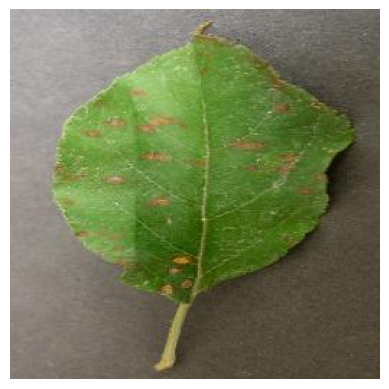

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
# Intensity Values ( Ranges from 0 to 255)

image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

# Train Test Split

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


# Convolution Neural Network

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.3))  # Dropout layer


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer for regularization
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,254,438 (84.89 MB)

 Trainable params: 22,254,438 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Training

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=15,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 114s 83ms/step - accuracy: 0.9770 - loss: 0.0696 - val_accuracy: 0.9121 - val_loss: 0.3798
Epoch 2/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 111s 81ms/step - accuracy: 0.9870 - loss: 0.0445 - val_accuracy: 0.9032 - val_loss: 0.4045
Epoch 4/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9875 - loss: 0.0391 - val_accuracy: 0.8854 - val_loss: 0.5895
Epoch 6/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 5.2557e-04
Epoch 7/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 80ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0.9113 - val_loss: 0.4744
Epoch 8/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 4s

# Model Evaluation

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9020 - loss: 0.5385
Validation Accuracy: 90.32%


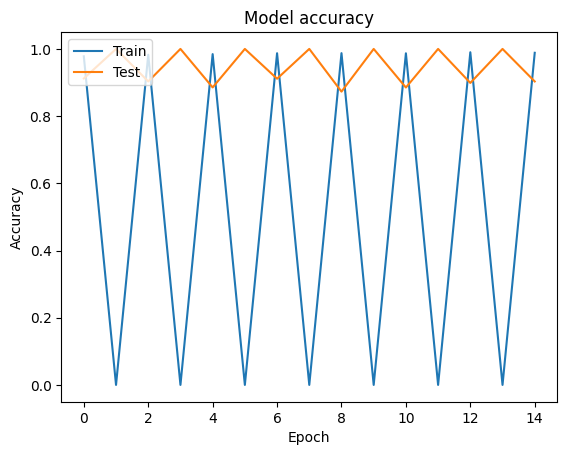

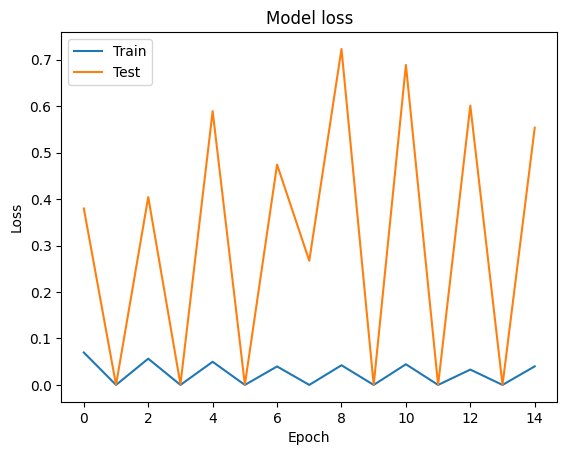

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a Predictive System

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Predicted Class Name: Apple___Black_rot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('drive/My Drive/DL_Project/plant_disease_prediction_model.h5')